# All code

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linear_sum_assignment
import networkx as nx

In [1]:
# Your original TASKS list
original_TASKS = [
    {'job': 'J1', 'machine': 'M1', 'dur': 45, 'prec': None},
    {'job': 'J1', 'machine': 'M3', 'dur': 10, 'prec': ('J1', 'M1')},
    {'job': 'J1', 'machine': 'M2', 'dur': 20, 'prec': ('J1', 'M3')},
    {'job': 'J2', 'machine': 'M1', 'dur': 20, 'prec': None},
    {'job': 'J2', 'machine': 'M2', 'dur': 10, 'prec': ('J2', 'M3')},
    {'job': 'J2', 'machine': 'M3', 'dur': 34, 'prec': ('J2', 'M1')},
    {'job': 'J3', 'machine': 'M1', 'dur': 12, 'prec': ('J3', 'M3')},
    {'job': 'J3', 'machine': 'M2', 'dur': 17, 'prec': ('J3', 'M1')},
    {'job': 'J3', 'machine': 'M3', 'dur': 28, 'prec': None}
    ]

In [69]:
# la01
TASK = [
    {'job': 'J1', 'machine': 'M2', 'dur': 21, 'prec': None},
    {'job': 'J2', 'machine': 'M1', 'dur': 21, 'prec': None},
    {'job': 'J3', 'machine': 'M4', 'dur': 39, 'prec': None},
    {'job': 'J4', 'machine': 'M2', 'dur': 77, 'prec': None},
    {'job': 'J5', 'machine': 'M1', 'dur': 83, 'prec': None},
    {'job': 'J6', 'machine': 'M2', 'dur': 54, 'prec': None},
    {'job': 'J7', 'machine': 'M4', 'dur': 69, 'prec': None},
    {'job': 'J8', 'machine': 'M3', 'dur': 38, 'prec': None},
    {'job': 'J9', 'machine': 'M4', 'dur': 17, 'prec': None},
    {'job': 'J10', 'machine': 'M5', 'dur': 77, 'prec': None},
    {'job': 'J1', 'machine': 'M1', 'dur': 53, 'prec': ('J1', 'M2')},
    {'job': 'J2', 'machine': 'M4', 'dur': 52, 'prec': ('J2', 'M1')},
    {'job': 'J3', 'machine': 'M5', 'dur': 98, 'prec': ('J3', 'M4')},
    {'job': 'J4', 'machine': 'M1', 'dur': 55, 'prec': ('J4', 'M2')},
    {'job': 'J5', 'machine': 'M4', 'dur': 34, 'prec': ('J5', 'M1')},
    {'job': 'J6', 'machine': 'M3', 'dur': 43, 'prec': ('J6', 'M2')},
    {'job': 'J7', 'machine': 'M5', 'dur': 77, 'prec': ('J7', 'M4')},
    {'job': 'J8', 'machine': 'M1', 'dur': 60, 'prec': ('J8', 'M3')},
    {'job': 'J9', 'machine': 'M2', 'dur': 49, 'prec': ('J9', 'M4')},
    {'job': 'J10', 'machine': 'M4', 'dur': 79, 'prec': ('J10', 'M5')},
    {'job': 'J1', 'machine': 'M5', 'dur': 95, 'prec': ('J1', 'M1')},
    {'job': 'J2', 'machine': 'M5', 'dur': 16, 'prec': ('J2', 'M4')},
    {'job': 'J3', 'machine': 'M2', 'dur': 42, 'prec': ('J3', 'M5')},
    {'job': 'J4', 'machine': 'M5', 'dur': 79, 'prec': ('J4', 'M1')},
    {'job': 'J5', 'machine': 'M3', 'dur': 64, 'prec': ('J5', 'M4')},
    {'job': 'J6', 'machine': 'M5', 'dur': 79, 'prec': ('J6', 'M3')},
    {'job': 'J7', 'machine': 'M2', 'dur': 87, 'prec': ('J7', 'M5')},
    {'job': 'J8', 'machine': 'M2', 'dur': 41, 'prec': ('J8', 'M1')},
    {'job': 'J9', 'machine': 'M5', 'dur': 25, 'prec': ('J9', 'M2')},
    {'job': 'J10', 'machine': 'M3', 'dur': 43, 'prec': ('J10', 'M4')},
    {'job': 'J1', 'machine': 'M4', 'dur': 55, 'prec': ('J1', 'M5')},
    {'job': 'J2', 'machine': 'M3', 'dur': 26, 'prec': ('J2', 'M5')},
    {'job': 'J3', 'machine': 'M3', 'dur': 31, 'prec': ('J3', 'M2')},
    {'job': 'J4', 'machine': 'M3', 'dur': 66, 'prec': ('J4', 'M5')},
    {'job': 'J5', 'machine': 'M2', 'dur': 19, 'prec': ('J5', 'M3')},
    {'job': 'J6', 'machine': 'M1', 'dur': 92, 'prec': ('J6', 'M5')},
    {'job': 'J7', 'machine': 'M3', 'dur': 87, 'prec': ('J7', 'M2')},
    {'job': 'J8', 'machine': 'M4', 'dur': 24, 'prec': ('J8', 'M2')},
    {'job': 'J9', 'machine': 'M1', 'dur': 44, 'prec': ('J9', 'M5')},
    {'job': 'J10', 'machine': 'M2', 'dur': 75, 'prec': ('J10', 'M3')},
    {'job': 'J1', 'machine': 'M3', 'dur': 34, 'prec': ('J1', 'M4')},
    {'job': 'J2', 'machine': 'M2', 'dur': 71, 'prec': ('J2', 'M3')},
    {'job': 'J3', 'machine': 'M1', 'dur': 12, 'prec': ('J3', 'M3')},
    {'job': 'J4', 'machine': 'M4', 'dur': 77, 'prec': ('J4', 'M3')},
    {'job': 'J5', 'machine': 'M5', 'dur': 37, 'prec': ('J5', 'M2')},
    {'job': 'J6', 'machine': 'M4', 'dur': 62, 'prec': ('J6', 'M1')},
    {'job': 'J7', 'machine': 'M1', 'dur': 93, 'prec': ('J7', 'M3')},
    {'job': 'J8', 'machine': 'M5', 'dur': 83, 'prec': ('J8', 'M4')},
    {'job': 'J9', 'machine': 'M3', 'dur': 98, 'prec': ('J9', 'M1')},
    {'job': 'J10', 'machine': 'M1', 'dur': 96, 'prec': ('J10', 'M2')}
]




In [70]:
custom_input = [
    {'job': 'J1', 'machine': 'M4', 'dur': 12, 'prec': None},
    {'job': 'J1', 'machine': 'M5', 'dur': 10, 'prec': ('J1', 'M4')},
    {'job': 'J1', 'machine': 'M3', 'dur': 14, 'prec': ('J1', 'M5')},
    {'job': 'J1', 'machine': 'M2', 'dur': 16, 'prec': ('J1', 'M3')},
    {'job': 'J1', 'machine': 'M1', 'dur': 18, 'prec': ('J1', 'M2')},
    {'job': 'J2', 'machine': 'M2', 'dur': 17, 'prec': None},
    {'job': 'J2', 'machine': 'M1', 'dur': 9, 'prec': ('J2', 'M2')},
    {'job': 'J2', 'machine': 'M4', 'dur': 14, 'prec': ('J2', 'M1')},
    {'job': 'J2', 'machine': 'M5', 'dur': 8, 'prec': ('J2', 'M4')},
    {'job': 'J2', 'machine': 'M3', 'dur': 11, 'prec': ('J2', 'M5')},
    {'job': 'J3', 'machine': 'M3', 'dur': 8, 'prec': None},
    {'job': 'J3', 'machine': 'M4', 'dur': 11, 'prec': ('J3', 'M3')},
    {'job': 'J3', 'machine': 'M2', 'dur': 7, 'prec': ('J3', 'M4')},
    {'job': 'J3', 'machine': 'M5', 'dur': 10, 'prec': ('J3', 'M2')},
    {'job': 'J3', 'machine': 'M1', 'dur': 13, 'prec': ('J3', 'M5')},
    {'job': 'J4', 'machine': 'M1', 'dur': 6, 'prec': None},
    {'job': 'J4', 'machine': 'M5', 'dur': 10, 'prec': ('J4', 'M1')},
    {'job': 'J4', 'machine': 'M4', 'dur': 15, 'prec': ('J4', 'M5')},
    {'job': 'J4', 'machine': 'M3', 'dur': 9, 'prec': ('J4', 'M4')},
    {'job': 'J4', 'machine': 'M2', 'dur': 8, 'prec': ('J4', 'M3')},
    {'job': 'J5', 'machine': 'M3', 'dur': 19, 'prec': None},
    {'job': 'J5', 'machine': 'M2', 'dur': 10, 'prec': ('J5', 'M3')},
    {'job': 'J5', 'machine': 'M4', 'dur': 8, 'prec': ('J5', 'M2')},
    {'job': 'J5', 'machine': 'M5', 'dur': 14, 'prec': ('J5', 'M4')},
    {'job': 'J5', 'machine': 'M1', 'dur': 16, 'prec': ('J5', 'M5')}
]


In [27]:
modified_TASKS = [
    {'job': 'J1', 'machine': 'M1', 'dur': 45, 'prec': None},
    {'job': 'J1', 'machine': 'M2', 'dur': 20, 'prec': ('J1', 'M1')},
    {'job': 'J2', 'machine': 'M1', 'dur': 20, 'prec': ('J2', 'M2')},
    {'job': 'J2', 'machine': 'M2', 'dur': 10, 'prec': None}
]


In [72]:
'''
def job_shop_scheduling_random_choose(TASKS):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    while TASKS:
        # Find tasks with prec = None
        no_prec_tasks = [task for task in TASKS if task['prec'] is None]
        
        if no_prec_tasks:
            next_task = random.choice(no_prec_tasks)
        else:
            # Find tasks with prec that have already been scheduled
            scheduled_prec_tasks = [task for task in TASKS if task['prec'] and task['prec'] in [(s[0], s[1]) for s in schedules]]

            next_task = random.choice(scheduled_prec_tasks)

        job, machine = next_task['job'], next_task['machine']
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + next_task['dur']
        schedule = (job, machine, start_time, end_time)
        job_times[job] = end_time
        machine_times[machine] = end_time
        schedules.append(schedule)
        TASKS.remove(next_task)

    return schedules
'''


"\ndef job_shop_scheduling_random_choose(TASKS):\n    machines = sorted(list(set(task['machine'] for task in TASKS)))\n    jobs = sorted(list(set(task['job'] for task in TASKS)))\n\n    job_times = {job: 0 for job in jobs}\n    machine_times = {machine: 0 for machine in machines}\n    schedules = []\n\n    while TASKS:\n        # Find tasks with prec = None\n        no_prec_tasks = [task for task in TASKS if task['prec'] is None]\n        \n        if no_prec_tasks:\n            next_task = random.choice(no_prec_tasks)\n        else:\n            # Find tasks with prec that have already been scheduled\n            scheduled_prec_tasks = [task for task in TASKS if task['prec'] and task['prec'] in [(s[0], s[1]) for s in schedules]]\n\n            next_task = random.choice(scheduled_prec_tasks)\n\n        job, machine = next_task['job'], next_task['machine']\n        start_time = max(job_times[job], machine_times[machine])\n        end_time = start_time + next_task['dur']\n        schedul

In [28]:
def job_shop_scheduling_random_choose(TASKS):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    while TASKS:
        # Find tasks that can be scheduled
        schedulable_tasks = [task for task in TASKS if task['prec'] is None or task['prec'] in [(s[0], s[1]) for s in schedules]]

        if schedulable_tasks:
            next_task = random.choice(schedulable_tasks)
        else:
            # If no schedulable tasks, break the loop to avoid infinite loop
            break

        job, machine = next_task['job'], next_task['machine']
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + next_task['dur']
        schedule = (job, machine, start_time, end_time)
        job_times[job] = end_time
        machine_times[machine] = end_time
        schedules.append(schedule)
        TASKS.remove(next_task)

    return schedules


In [29]:
def sampling_jss(TASKS , rev):
  all_schedules = {}
  for i in range(rev):
    # Make a copy of the original_TASKS to use in each example
    task = TASKS.copy()
    example_schedule = job_shop_scheduling_random_choose(task)

    # Store the schedule in the dictionary with the example number as the key
    all_schedules[i] = example_schedule
  return all_schedules

In [30]:
# Create an empty list to store scheduling information
scheduling_info = []

# Iterate through the schedules and add them to the list
for example, schedule in sampling_jss(modified_TASKS,1000).items():
    for step, (job, machine, start_time, end_time) in enumerate(schedule, start=1):
        scheduling_info.append({'Example': example, 'Job': job, 'Machine': machine, 'Start Time': start_time, 'End Time': end_time})
df = pd.DataFrame(scheduling_info)
print(df)

      Example Job Machine  Start Time  End Time
0           0  J2      M2           0        10
1           0  J2      M1          10        30
2           0  J1      M1          30        75
3           0  J1      M2          75        95
4           1  J1      M1           0        45
...       ...  ..     ...         ...       ...
3995      998  J2      M1          45        65
3996      999  J2      M2           0        10
3997      999  J1      M1           0        45
3998      999  J2      M1          45        65
3999      999  J1      M2          45        65

[4000 rows x 5 columns]


In [31]:
# Convert the "End Time" column to numeric
df['End Time'] = pd.to_numeric(df['End Time'])

# Group the DataFrame by the "Example" column
grouped = df.groupby('Example')

# Initialize empty lists to store results
max_end_times = []
job_machine_sequences = []

# Iterate through each example group
for example, group in grouped:
    # Find the index of the maximum end time for this example
    max_end_time_index = group['End Time'].idxmax()

    # Get all job and machine sequences for this example
    sequences = group[['Job', 'Machine']].values.tolist()

    # Append the results to the lists
    max_end_times.append(group.loc[max_end_time_index, 'End Time'])
    job_machine_sequences.append(sequences)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Example': grouped.groups.keys(), 'Max_End_Time': max_end_times, 'Job_Machine_Sequences': job_machine_sequences})

result_df['Job_Machine_Sequences'] = result_df['Job_Machine_Sequences'].apply(lambda x: tuple(map(tuple, x)))

# Drop duplicates
result_df = result_df.drop_duplicates(subset=['Max_End_Time', 'Job_Machine_Sequences'])

print(result_df)

    Example  Max_End_Time                     Job_Machine_Sequences
0         0            95  ((J2, M2), (J2, M1), (J1, M1), (J1, M2))
1         1            95  ((J1, M1), (J1, M2), (J2, M2), (J2, M1))
2         2            65  ((J1, M1), (J2, M2), (J2, M1), (J1, M2))
5         5            65  ((J1, M1), (J2, M2), (J1, M2), (J2, M1))
11       11            65  ((J2, M2), (J1, M1), (J2, M1), (J1, M2))
12       12            65  ((J2, M2), (J1, M1), (J1, M2), (J2, M1))


In [32]:
# Sort the DataFrame by the "Min_End_Time" column in ascending order
sorted_df = result_df.copy().sort_values(by='Max_End_Time', ascending=True)

# Get the top 30 minimum end times and their associated sequences
top_min_end_times= sorted_df.head(3)
top_min_end_times = top_min_end_times[['Example' , 'Max_End_Time' , 'Job_Machine_Sequences']]
top_min_end_times_example = top_min_end_times['Example'].values
top_min_end_times['Weight'] = 1000/top_min_end_times['Max_End_Time']
top_min_end_times

,Example,Max_End_Time,Job_Machine_Sequences,Weight
2,2,65,"((J1, M1), (J2, M2), (J2, M1), (J1, M2))",15.384615
5,5,65,"((J1, M1), (J2, M2), (J1, M2), (J2, M1))",15.384615
11,11,65,"((J2, M2), (J1, M1), (J2, M1), (J1, M2))",15.384615


In [33]:

# Get unique values of 'Max_End_Time' and assign weights
unique_max_end_times = top_min_end_times['Max_End_Time'].unique()
weights = {max_end_time: 225*len(unique_max_end_times) - 225*i for i, max_end_time in enumerate(unique_max_end_times)}

# Assign weights based on 'Max_End_Time'
top_min_end_times['Weight'] = top_min_end_times['Max_End_Time'].map(weights)

top_min_end_times


,Example,Max_End_Time,Job_Machine_Sequences,Weight
2,2,65,"((J1, M1), (J2, M2), (J2, M1), (J1, M2))",225
5,5,65,"((J1, M1), (J2, M2), (J1, M2), (J2, M1))",225
11,11,65,"((J2, M2), (J1, M1), (J2, M1), (J1, M2))",225


In [34]:
df_sorted = df.copy()
df_sorted = df[df['Example'].isin(top_min_end_times_example)]
print(df_sorted)

    Example Job Machine  Start Time  End Time
8         2  J1      M1           0        45
9         2  J2      M2           0        10
10        2  J2      M1          45        65
11        2  J1      M2          45        65
20        5  J1      M1           0        45
21        5  J2      M2           0        10
22        5  J1      M2          45        65
23        5  J2      M1          45        65
44       11  J2      M2           0        10
45       11  J1      M1           0        45
46       11  J2      M1          45        65
47       11  J1      M2          45        65


In [35]:
def generate_random_color():
    # Generate a random color in hexadecimal format
    return "#{:06x}".format(np.random.randint(0, 256**3))


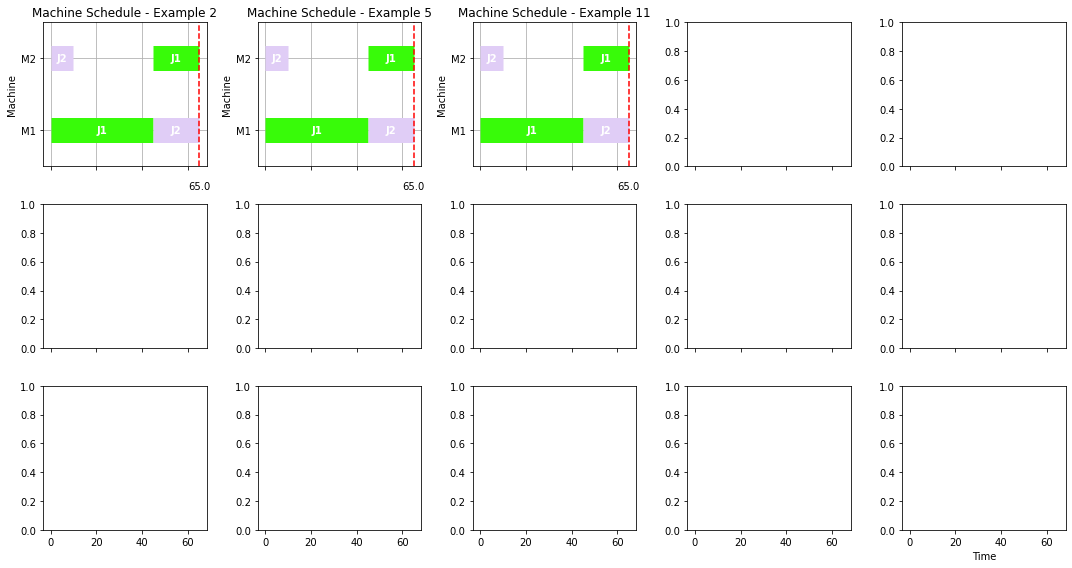

In [36]:
def visualize_gantt_chart_machine(df):
    unique_examples = df_sorted['Example'].unique()
    num_examples = len(unique_examples)
    num_rows = 3
    num_columns = 5
    num_subplots = num_rows * num_columns

    if num_examples > num_subplots:
        print("Warning: More examples than available subplots. Some examples will not be shown.")

    fig, axs = plt.subplots(min(num_rows, num_examples), num_columns, figsize=(15, 8), sharex=True)

    # Define a dictionary to map jobs to colors
    unique_jobs = df_sorted['Job'].unique()
    job_colors = {job: generate_random_color() for job in unique_jobs}

    for i, example in enumerate(unique_examples[:num_subplots]):
        example_data = df_sorted[df_sorted['Example'] == example]

        MACHINES = sorted(list(example_data['Machine'].unique()))
        makespan = example_data['End Time'].max()

        bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
        text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

        example_data.sort_values(by=['Machine', 'Start Time'])
        example_data.set_index(['Machine', 'Job'], inplace=True)

        row_idx = i // num_columns
        col_idx = i % num_columns

        axs[row_idx, col_idx].set_title(f'Machine Schedule - Example {example}')
        axs[row_idx, col_idx].set_ylabel('Machine')
        axs[row_idx, col_idx].set_ylim(0.5, len(MACHINES) + 0.5)
        axs[row_idx, col_idx].set_yticks(range(1, 1 + len(MACHINES)))
        axs[row_idx, col_idx].set_yticklabels(MACHINES)

        for mdx, m in enumerate(MACHINES, 1):
            for jdx, j in enumerate(example_data.loc[m].index, 1):
                xs = example_data.loc[(m, j), 'Start Time']
                xf = example_data.loc[(m, j), 'End Time']
                
                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified
                
                axs[row_idx, col_idx].plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                axs[row_idx, col_idx].text((xs + xf) / 2, mdx, j, **text_style)

        axs[row_idx, col_idx].text(makespan, axs[row_idx, col_idx].get_ylim()[0] - 0.2, "{0:0.1f}".format(makespan),
                                   ha='center', va='top')
        axs[row_idx, col_idx].plot([makespan] * 2, axs[row_idx, col_idx].get_ylim(), 'r--')
        axs[row_idx, col_idx].grid(True)

    axs[-1, -1].set_xlabel('Time')

    fig.tight_layout()
    plt.show()

# Assuming df_sorted is your DataFrame
visualize_gantt_chart_machine(df_sorted)


In [82]:
'''
# Get unique sequences from the 'Job_Machine_Sequences' column
all_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]
unique_sequences = list(set(tuple(seq) for seq in all_sequences))
# Create a dictionary to store the frequency count of job sequences
job_count = {}

# Iterate through the Job_Machine_Sequences
for sequence in top_min_end_times['Job_Machine_Sequences']:
    for i in range(0, len(sequence)-1):
        current_job, current_machine = sequence[i]
        for j in range(i + 1, len(sequence)):
            next_job, next_machine = sequence[j]

            # Create a unique identifier for the job transition
            transition_key = (current_job, current_machine, next_job, next_machine)

            # Update the frequency count for the job transition
            if transition_key in job_count:
                job_count[transition_key] += 1
            else:
                job_count[transition_key] = 1
job_count
'''

"\n# Get unique sequences from the 'Job_Machine_Sequences' column\nall_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]\nunique_sequences = list(set(tuple(seq) for seq in all_sequences))\n# Create a dictionary to store the frequency count of job sequences\njob_count = {}\n\n# Iterate through the Job_Machine_Sequences\nfor sequence in top_min_end_times['Job_Machine_Sequences']:\n    for i in range(0, len(sequence)-1):\n        current_job, current_machine = sequence[i]\n        for j in range(i + 1, len(sequence)):\n            next_job, next_machine = sequence[j]\n\n            # Create a unique identifier for the job transition\n            transition_key = (current_job, current_machine, next_job, next_machine)\n\n            # Update the frequency count for the job transition\n            if transition_key in job_count:\n                job_count[transition_key] += 1\n            else:\n                job_count[transition_key] 

In [83]:
'''
ll_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]
unique_sequences = list(set(tuple(seq) for seq in all_sequences))

# Create a NumPy array to store the frequency counts
job_count_array = np.zeros((len(unique_sequences), len(unique_sequences)))

# Create a dictionary to store the frequency count of job sequences
job_count = {}

# Iterate through the Job_Machine_Sequences
for sequence in top_min_end_times['Job_Machine_Sequences']:
    for i in range(0, len(sequence)-1):
        current_job, current_machine = sequence[i]
        for j in range(i + 1, len(sequence)):
            next_job, next_machine = sequence[j]

            # Create a unique identifier for the job transition
            transition_key = (current_job, current_machine, next_job, next_machine)

            # Update the frequency count for the job transition
            if transition_key in job_count:
                job_count[transition_key] += 1
            else:
                job_count[transition_key] = 1

# Populate the array with the frequency counts
for i, sequence1 in enumerate(unique_sequences):
    for j, sequence2 in enumerate(unique_sequences):
        for k in range(1, len(sequence1)):
            for l in range(1, len(sequence2)):
                job_count_array[i, j] += job_count.get((sequence1[k - 1], sequence1[k], sequence2[l - 1], sequence2[l]), 0)                
job_count_array
'''

"\nll_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]\nunique_sequences = list(set(tuple(seq) for seq in all_sequences))\n\n# Create a NumPy array to store the frequency counts\njob_count_array = np.zeros((len(unique_sequences), len(unique_sequences)))\n\n# Create a dictionary to store the frequency count of job sequences\njob_count = {}\n\n# Iterate through the Job_Machine_Sequences\nfor sequence in top_min_end_times['Job_Machine_Sequences']:\n    for i in range(0, len(sequence)-1):\n        current_job, current_machine = sequence[i]\n        for j in range(i + 1, len(sequence)):\n            next_job, next_machine = sequence[j]\n\n            # Create a unique identifier for the job transition\n            transition_key = (current_job, current_machine, next_job, next_machine)\n\n            # Update the frequency count for the job transition\n            if transition_key in job_count:\n                job_count[transition_key

In [37]:
# Assuming top_min_end_times is a DataFrame
# It might look something like this:
# top_min_end_times = pd.DataFrame({'Max_End_Time': [...], 'Job_Machine_Sequences': [...], 'Weight': [...]})

# Extract unique sequences and weights from the DataFrame
all_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]
unique_sequences = list(set(tuple(seq) for seq in all_sequences))

# Create a NumPy array to store the frequency counts
job_count_array = np.zeros((len(unique_sequences), len(unique_sequences)))

# Create a dictionary to store the frequency count of job sequences
job_count = {}

# Iterate through the Job_Machine_Sequences
for index, sequence in enumerate(top_min_end_times['Job_Machine_Sequences']):
    sequence_weight = top_min_end_times['Weight'].iloc[index]  # Assuming the 'Weight' column exists
    for i in range(0, len(sequence) - 1):
        current_job, current_machine = sequence[i]
        for j in range(i + 1, len(sequence)):
            next_job, next_machine = sequence[j]

            # Create a unique identifier for the job transition
            transition_key = (current_job, current_machine, next_job, next_machine)

            # Update the frequency count for the job transition with the weighted count
            if transition_key in job_count:
                job_count[transition_key] += sequence_weight
            else:
                job_count[transition_key] = sequence_weight

# Populate the array with the frequency counts
for i, sequence1 in enumerate(unique_sequences):
    for j, sequence2 in enumerate(unique_sequences):
        for k in range(1, len(sequence1)):
            for l in range(1, len(sequence2)):
                job_count_array[i, j] += job_count.get((sequence1[k - 1], sequence1[k], sequence2[l - 1], sequence2[l]), 0)
job_count_df = pd.DataFrame(job_count_array, index=unique_sequences, columns=unique_sequences)
job_count_df = job_count_df.astype(int)
job_count_df

,"(J2, M2)","(J1, M2)","(J2, M1)","(J1, M1)"
"(J2, M2)",0,675,675,225
"(J1, M2)",0,0,225,0
"(J2, M1)",0,450,0,0
"(J1, M1)",450,675,675,0


In [38]:
df = job_count_df.copy()
max_value = job_count_df.values.max()
df = df.replace(range(0,int(max_value//2)+1) , float('inf'))
result_df = max_value - df.values
result_df = pd.DataFrame(result_df)
result_df.columns = job_count_df.columns
result_df.index = job_count_df.index
result_df = result_df.replace(-float('inf') , float('inf'))
result_df = result_df.replace(float('inf') , 10000*max_value)
# Filter out rows where all values are equal to max_value
result_df = result_df[~(result_df.apply(lambda row: all(val == 10000*max_value for val in row), axis=1))]
#result_df = result_df[~(result_df.apply(lambda col: all(val == 10000*max_value for val in col), axis=0))]
#result_df = result_df[~(result_df.apply(lambda row: all(val == 10000*max_value for val in row), axis=1) | result_df.apply(lambda col: all(val == 10000*max_value for val in col), axis=0))]
#result_df.to_csv('Pre_Hungarian.csv')
result_df


,"(J2, M2)","(J1, M2)","(J2, M1)","(J1, M1)"
"(J2, M2)",6750000.0,0.0,0.0,6750000.0
"(J2, M1)",6750000.0,225.0,6750000.0,6750000.0
"(J1, M1)",225.0,0.0,0.0,6750000.0


In [39]:
#Create a cost matrix (replace this with your actual cost matrix)
cost_matrix = result_df.copy()
cost_matrix = cost_matrix.values
# Use the linear_sum_assignmendt function to solve the assignment problem
row_indices, col_indices = linear_sum_assignment(cost_matrix)
optimal_assignment = []
order_assignment = []  # Initialize an empty list

for i in range(len(row_indices)):
    task_index = result_df.index[row_indices[i]]
    agent_index = result_df.columns[col_indices[i]]
    optimal_assignment.append((task_index, agent_index))
    order_assignment.append((task_index, agent_index))  # Use append() for a list
order_assignment


[(('J2', 'M2'), ('J2', 'M1')),
 (('J2', 'M1'), ('J1', 'M2')),
 (('J1', 'M1'), ('J2', 'M2'))]

In [40]:
def show_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Set the figure size
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw the graph with improved styling
    pos = nx.spring_layout(G)  # Specify a seed for reproducibility
    nx.draw(G, pos, with_labels=True, node_size=400, node_color='lightblue', edge_color='gray', font_size=5, font_color='black', font_weight='bold', arrowsize=15)

    # Show the plot
    plt.show()

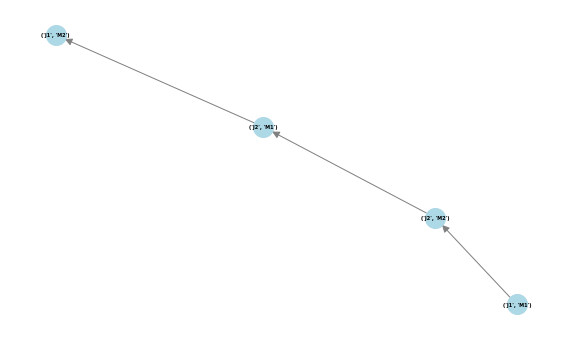

In [41]:
show_sequence(order_assignment)

In [20]:
'''
def get_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Get the topological sort
    topological_order = list(nx.topological_sort(G))

    # Create a list of job-machine sequences
    sequences = [(topological_order[i]) for i in range(len(topological_order))]

    return sequences
sequences = get_sequence(order_assignment)
print(sequences)
'''

'\ndef get_sequence(order_assignment):\n    G = nx.DiGraph()\n    for pair in order_assignment:\n        G.add_edge(pair[0], pair[1])\n\n    # Get the topological sort\n    topological_order = list(nx.topological_sort(G))\n\n    # Create a list of job-machine sequences\n    sequences = [(topological_order[i]) for i in range(len(topological_order))]\n\n    return sequences\nsequences = get_sequence(order_assignment)\nprint(sequences)\n'

In [42]:
def get_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Check if the graph has cycles
    if not nx.is_directed_acyclic_graph(G):
        print("The graph contains cycles. Removing cycles...")
        cycles = list(nx.simple_cycles(G))
        # Break the cycles by removing edges
        for cycle in cycles:
            for i in range(len(cycle)):
                G.remove_edge(cycle[i], cycle[(i+1) % len(cycle)])  # Remove edges to break the cycle

    # Get the topological sort
    topological_order = list(nx.topological_sort(G))

    # Create a list of job-machine sequences
    sequences = [(topological_order[i]) for i in range(len(topological_order))]

    return sequences


In [43]:
def job_shop_scheduling_sequence(TASKS, sequence):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    for task_pair in sequence:
        job, machine = task_pair
        next_task = next((task for task in TASKS if task['job'] == job and task['machine'] == machine), None)

        if next_task:
            start_time = max(job_times[job], machine_times[machine])
            end_time = start_time + next_task['dur']
            schedule = (job, machine, start_time, end_time)
            job_times[job] = end_time
            machine_times[machine] = end_time
            schedules.append(schedule)
            TASKS.remove(next_task)

    return schedules
result_schedules = job_shop_scheduling_sequence(modified_TASKS.copy(), sequences)
result_schedules


[('J2', 'M2', 0, 10),
 ('J1', 'M1', 0, 45),
 ('J2', 'M1', 45, 65),
 ('J1', 'M2', 45, 65)]

In [44]:
def job_shop_scheduling_sequence_to_df(schedule_data):
    df_schedule = pd.DataFrame(schedule_data, columns=['Job', 'Machine', 'Start Time', 'End Time'])

# Add the 'Example' column
    df_schedule['Example'] = (df_schedule.groupby(['Job', 'Machine']).cumcount() + 1).astype(str)

# Reorder columns
    df_schedule = df_schedule[['Example', 'Job', 'Machine', 'Start Time', 'End Time']]

# Print the DataFrame
    return(df_schedule)

In [45]:
job_shop_scheduling_sequence_to_df(result_schedules)

,Example,Job,Machine,Start Time,End Time
0,1,J2,M2,0,10
1,1,J1,M1,0,45
2,1,J2,M1,45,65
3,1,J1,M2,45,65


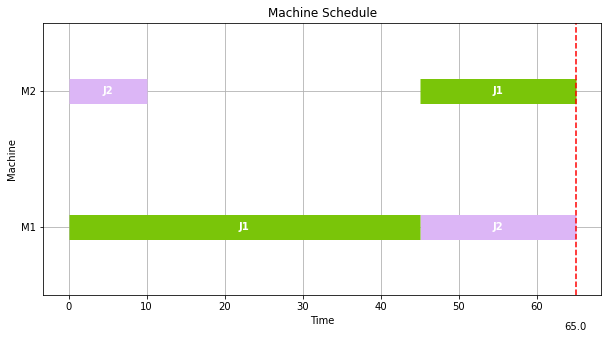

In [46]:
# Plot this sequence
def visualize_gantt_chart_machine_sequence(df):
    MACHINES = sorted(list(df['Machine'].unique()))
    unique_jobs = df['Job'].unique()
    num_jobs = len(unique_jobs)
    makespan = df['End Time'].max()

    # Define a dictionary to map jobs to colors
    job_colors = {job: generate_random_color() for job in unique_jobs}

    plt.figure(figsize=(10, 5))

    bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
    text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

    df.sort_values(by=['Machine', 'Start Time'])
    df.set_index(['Machine', 'Job'], inplace=True)

    plt.title('Machine Schedule')
    plt.ylabel('Machine')
    plt.ylim(0.5, len(MACHINES) + 0.5)
    plt.yticks(range(1, 1 + len(MACHINES)), MACHINES)

    for mdx, m in enumerate(MACHINES, 1):
        for jdx, j in enumerate(unique_jobs, 1):
            if (m, j) in df.index:
                xs = df.loc[(m, j), 'Start Time']
                xf = df.loc[(m, j), 'End Time']

                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified

                plt.plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                plt.text((xs + xf) / 2, mdx, j, **text_style)

    plt.text(makespan, plt.ylim()[0] - 0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
    plt.plot([makespan] * 2, plt.ylim(), 'r--')
    plt.grid(True)

    plt.xlabel('Time')
    plt.show()

# Assuming df_sorted is your DataFrame
# To visualize all examples, use: visualize_gantt_chart_machine(df_sorted)
visualize_gantt_chart_machine_sequence(job_shop_scheduling_sequence_to_df(result_schedules))


# Combine code 

In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import linear_sum_assignment
import networkx as nx
import time

In [101]:
TASK = [
    {'job': 'J1', 'machine': 'M2', 'dur': 21, 'prec': None},
    {'job': 'J2', 'machine': 'M1', 'dur': 21, 'prec': None},
    {'job': 'J3', 'machine': 'M4', 'dur': 39, 'prec': None},
    {'job': 'J4', 'machine': 'M2', 'dur': 77, 'prec': None},
    {'job': 'J5', 'machine': 'M1', 'dur': 83, 'prec': None},
    {'job': 'J6', 'machine': 'M2', 'dur': 54, 'prec': None},
    {'job': 'J7', 'machine': 'M4', 'dur': 69, 'prec': None},
    {'job': 'J8', 'machine': 'M3', 'dur': 38, 'prec': None},
    {'job': 'J9', 'machine': 'M4', 'dur': 17, 'prec': None},
    {'job': 'J10', 'machine': 'M5', 'dur': 77, 'prec': None},
    {'job': 'J1', 'machine': 'M1', 'dur': 53, 'prec': ('J1', 'M2')},
    {'job': 'J2', 'machine': 'M4', 'dur': 52, 'prec': ('J2', 'M1')},
    {'job': 'J3', 'machine': 'M5', 'dur': 98, 'prec': ('J3', 'M4')},
    {'job': 'J4', 'machine': 'M1', 'dur': 55, 'prec': ('J4', 'M2')},
    {'job': 'J5', 'machine': 'M4', 'dur': 34, 'prec': ('J5', 'M1')},
    {'job': 'J6', 'machine': 'M3', 'dur': 43, 'prec': ('J6', 'M2')},
    {'job': 'J7', 'machine': 'M5', 'dur': 77, 'prec': ('J7', 'M4')},
    {'job': 'J8', 'machine': 'M1', 'dur': 60, 'prec': ('J8', 'M3')},
    {'job': 'J9', 'machine': 'M2', 'dur': 49, 'prec': ('J9', 'M4')},
    {'job': 'J10', 'machine': 'M4', 'dur': 79, 'prec': ('J10', 'M5')},
    {'job': 'J1', 'machine': 'M5', 'dur': 95, 'prec': ('J1', 'M1')},
    {'job': 'J2', 'machine': 'M5', 'dur': 16, 'prec': ('J2', 'M4')},
    {'job': 'J3', 'machine': 'M2', 'dur': 42, 'prec': ('J3', 'M5')},
    {'job': 'J4', 'machine': 'M5', 'dur': 79, 'prec': ('J4', 'M1')},
    {'job': 'J5', 'machine': 'M3', 'dur': 64, 'prec': ('J5', 'M4')},
    {'job': 'J6', 'machine': 'M5', 'dur': 79, 'prec': ('J6', 'M3')},
    {'job': 'J7', 'machine': 'M2', 'dur': 87, 'prec': ('J7', 'M5')},
    {'job': 'J8', 'machine': 'M2', 'dur': 41, 'prec': ('J8', 'M1')},
    {'job': 'J9', 'machine': 'M5', 'dur': 25, 'prec': ('J9', 'M2')},
    {'job': 'J10', 'machine': 'M3', 'dur': 43, 'prec': ('J10', 'M4')},
    {'job': 'J1', 'machine': 'M4', 'dur': 55, 'prec': ('J1', 'M5')},
    {'job': 'J2', 'machine': 'M3', 'dur': 26, 'prec': ('J2', 'M5')},
    {'job': 'J3', 'machine': 'M3', 'dur': 31, 'prec': ('J3', 'M2')},
    {'job': 'J4', 'machine': 'M3', 'dur': 66, 'prec': ('J4', 'M5')},
    {'job': 'J5', 'machine': 'M2', 'dur': 19, 'prec': ('J5', 'M3')},
    {'job': 'J6', 'machine': 'M1', 'dur': 92, 'prec': ('J6', 'M5')},
    {'job': 'J7', 'machine': 'M3', 'dur': 87, 'prec': ('J7', 'M2')},
    {'job': 'J8', 'machine': 'M4', 'dur': 24, 'prec': ('J8', 'M2')},
    {'job': 'J9', 'machine': 'M1', 'dur': 44, 'prec': ('J9', 'M5')},
    {'job': 'J10', 'machine': 'M2', 'dur': 75, 'prec': ('J10', 'M3')},
    {'job': 'J1', 'machine': 'M3', 'dur': 34, 'prec': ('J1', 'M4')},
    {'job': 'J2', 'machine': 'M2', 'dur': 71, 'prec': ('J2', 'M3')},
    {'job': 'J3', 'machine': 'M1', 'dur': 12, 'prec': ('J3', 'M3')},
    {'job': 'J4', 'machine': 'M4', 'dur': 77, 'prec': ('J4', 'M3')},
    {'job': 'J5', 'machine': 'M5', 'dur': 37, 'prec': ('J5', 'M2')},
    {'job': 'J6', 'machine': 'M4', 'dur': 62, 'prec': ('J6', 'M1')},
    {'job': 'J7', 'machine': 'M1', 'dur': 93, 'prec': ('J7', 'M3')},
    {'job': 'J8', 'machine': 'M5', 'dur': 83, 'prec': ('J8', 'M4')},
    {'job': 'J9', 'machine': 'M3', 'dur': 98, 'prec': ('J9', 'M1')},
    {'job': 'J10', 'machine': 'M1', 'dur': 96, 'prec': ('J10', 'M2')}
]



In [97]:
TASK =  [
        {'job': 'J1', 'machine': 'M1', 'dur': 45, 'prec': None},
        {'job': 'J1', 'machine': 'M3', 'dur': 10, 'prec': [('J1', 'M1')]},
        {'job': 'J1', 'machine': 'M2', 'dur': 20, 'prec': [('J1', 'M3')]},
        {'job': 'J2', 'machine': 'M1', 'dur': 20, 'prec': None},
        {'job': 'J2', 'machine': 'M2', 'dur': 10, 'prec': [('J2', 'M3')]},
        {'job': 'J2', 'machine': 'M3', 'dur': 34, 'prec': [('J2', 'M1')]},
        {'job': 'J3', 'machine': 'M1', 'dur': 12, 'prec': [('J3', 'M3')]},
        {'job': 'J3', 'machine': 'M2', 'dur': 17, 'prec': [('J3', 'M1')]},
        {'job': 'J3', 'machine': 'M3', 'dur': 28, 'prec': None}
    ]

In [1]:
start = time.time()
def job_shop_scheduling_random_choose(TASKS):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    while TASKS:
        # Find tasks that can be scheduled
        schedulable_tasks = [task for task in TASKS if task['prec'] is None or task['prec'] in [(s[0], s[1]) for s in schedules]]

        if schedulable_tasks:
            next_task = random.choice(schedulable_tasks)
        else:
            # If no schedulable tasks, break the loop to avoid infinite loop
            break

        job, machine = next_task['job'], next_task['machine']
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + next_task['dur']
        schedule = (job, machine, start_time, end_time)
        job_times[job] = end_time
        machine_times[machine] = end_time
        schedules.append(schedule)
        TASKS.remove(next_task)

    return schedules

def sampling_jss(TASKS , rev):
  all_schedules = {}
  for i in range(rev):
    # Make a copy of the original_TASKS to use in each example
    task = TASKS.copy()
    example_schedule = job_shop_scheduling_random_choose(task)

    # Store the schedule in the dictionary with the example number as the key
    all_schedules[i] = example_schedule
  return all_schedules

# Create an empty list to store scheduling information
scheduling_info = []

# Iterate through the schedules and add them to the list
for example, schedule in sampling_jss(original_TASKS,500).items():
    for step, (job, machine, start_time, end_time) in enumerate(schedule, start=1):
        scheduling_info.append({'Example': example, 'Job': job, 'Machine': machine, 'Start Time': start_time, 'End Time': end_time})
df = pd.DataFrame(scheduling_info)

# Convert the "End Time" column to numeric
df['End Time'] = pd.to_numeric(df['End Time'])

# Group the DataFrame by the "Example" column
grouped = df.groupby('Example')

# Initialize empty lists to store results
max_end_times = []
job_machine_sequences = []

# Iterate through each example group
for example, group in grouped:
    # Find the index of the maximum end time for this example
    max_end_time_index = group['End Time'].idxmax()

    # Get all job and machine sequences for this example
    sequences = group[['Job', 'Machine']].values.tolist()

    # Append the results to the lists
    max_end_times.append(group.loc[max_end_time_index, 'End Time'])
    job_machine_sequences.append(sequences)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Example': grouped.groups.keys(), 'Max_End_Time': max_end_times, 'Job_Machine_Sequences': job_machine_sequences})

# Sort the DataFrame by the "Min_End_Time" column in ascending order
sorted_df = result_df.copy().sort_values(by='Max_End_Time', ascending=True)
#print(sorted_df)
# Get the top 15 minimum end times and their associated sequences
top_min_end_times= sorted_df.head(15)
top_min_end_times = top_min_end_times[['Example' , 'Max_End_Time' , 'Job_Machine_Sequences']]
top_min_end_times_example = top_min_end_times['Example'].values

# Get unique values of 'Max_End_Time' and assign weights
unique_max_end_times = top_min_end_times['Max_End_Time'].unique()
weights = {max_end_time: 225*len(unique_max_end_times) - 225*i for i, max_end_time in enumerate(unique_max_end_times)}

# Assign weights based on 'Max_End_Time'
top_min_end_times['Weight'] = top_min_end_times['Max_End_Time'].map(weights)
print(top_min_end_times)
df_sorted = df.copy()
df_sorted = df[df['Example'].isin(top_min_end_times_example)]

def generate_random_color():
    # Generate a random color in hexadecimal format
    return "#{:06x}".format(np.random.randint(0, 256**3))

def visualize_gantt_chart_machine(df):
    unique_examples = df_sorted['Example'].unique()
    num_examples = len(unique_examples)
    num_rows = 5
    num_columns = 3
    num_subplots = num_rows * num_columns

    if num_examples > num_subplots:
        print("Warning: More examples than available subplots. Some examples will not be shown.")

    fig, axs = plt.subplots(min(num_rows, num_examples), num_columns, figsize=(15, 8), sharex=True)

    # Define a dictionary to map jobs to colors
    unique_jobs = df_sorted['Job'].unique()
    job_colors = {job: generate_random_color() for job in unique_jobs}

    for i, example in enumerate(unique_examples[:num_subplots]):
        example_data = df_sorted[df_sorted['Example'] == example]

        MACHINES = sorted(list(example_data['Machine'].unique()))
        makespan = example_data['End Time'].max()

        bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
        text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

        example_data.sort_values(by=['Machine', 'Start Time'])
        example_data.set_index(['Machine', 'Job'], inplace=True)

        row_idx = i // num_columns
        col_idx = i % num_columns

        axs[row_idx, col_idx].set_title(f'Machine Schedule - Example {example}')
        axs[row_idx, col_idx].set_ylabel('Machine')
        axs[row_idx, col_idx].set_ylim(0.5, len(MACHINES) + 0.5)
        axs[row_idx, col_idx].set_yticks(range(1, 1 + len(MACHINES)))
        axs[row_idx, col_idx].set_yticklabels(MACHINES)

        for mdx, m in enumerate(MACHINES, 1):
            for jdx, j in enumerate(example_data.loc[m].index, 1):
                xs = example_data.loc[(m, j), 'Start Time']
                xf = example_data.loc[(m, j), 'End Time']
                
                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified
                
                axs[row_idx, col_idx].plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                axs[row_idx, col_idx].text((xs + xf) / 2, mdx, j, **text_style)

        axs[row_idx, col_idx].text(makespan, axs[row_idx, col_idx].get_ylim()[0] - 0.2, "{0:0.1f}".format(makespan),
                                   ha='center', va='top')
        axs[row_idx, col_idx].plot([makespan] * 2, axs[row_idx, col_idx].get_ylim(), 'r--')
        axs[row_idx, col_idx].grid(True)

    axs[-1, -1].set_xlabel('Time')

    fig.tight_layout()
    plt.show()

# Assuming df_sorted is your DataFrame
#visualize_gantt_chart_machine(df_sorted)

# Extract unique sequences and weights from the DataFrame
all_sequences = [sequence for sublist in top_min_end_times['Job_Machine_Sequences'] for sequence in sublist]
unique_sequences = list(set(tuple(seq) for seq in all_sequences))

# Create a NumPy array to store the frequency counts
job_count_array = np.zeros((len(unique_sequences), len(unique_sequences)))

# Create a dictionary to store the frequency count of job sequences
job_count = {}

# Iterate through the Job_Machine_Sequences
for index, sequence in enumerate(top_min_end_times['Job_Machine_Sequences']):
    sequence_weight = top_min_end_times['Weight'].iloc[index]  # Assuming the 'Weight' column exists
    for i in range(0, len(sequence) - 1):
        current_job, current_machine = sequence[i]
        for j in range(i + 1, len(sequence)):
            next_job, next_machine = sequence[j]

            # Create a unique identifier for the job transition
            transition_key = (current_job, current_machine, next_job, next_machine)

            # Update the frequency count for the job transition with the weighted count
            if transition_key in job_count:
                job_count[transition_key] += sequence_weight
            else:
                job_count[transition_key] = sequence_weight

# Populate the array with the frequency counts
for i, sequence1 in enumerate(unique_sequences):
    for j, sequence2 in enumerate(unique_sequences):
        for k in range(1, len(sequence1)):
            for l in range(1, len(sequence2)):
                job_count_array[i, j] += job_count.get((sequence1[k - 1], sequence1[k], sequence2[l - 1], sequence2[l]), 0)
job_count_df = pd.DataFrame(job_count_array, index=unique_sequences, columns=unique_sequences)
job_count_df = job_count_df.astype(int)

df = job_count_df.copy()
max_value = job_count_df.values.max()
df = df.replace(range(0,(max_value//2)+1) , float('inf'))
result_df = max_value - df.values
result_df = pd.DataFrame(result_df)
result_df.columns = job_count_df.columns
result_df.index = job_count_df.index
result_df = result_df.replace(-float('inf') , float('inf'))
result_df = result_df.replace(float('inf') , 10000*max_value)
# Filter out rows where all values are equal to max_value
result_df = result_df[~(result_df.apply(lambda row: all(val == 10000*max_value for val in row), axis=1))]
#result_df = result_df.loc[:, ~(result_df.apply(lambda col: all(col[i] <= col[i+1] for i in range(len(col)-1)), axis=0))]

#Create a cost matrix (replace this with your actual cost matrix)
cost_matrix = result_df.copy()
cost_matrix = cost_matrix.values
# Use the linear_sum_assignmendt function to solve the assignment problem
row_indices, col_indices = linear_sum_assignment(cost_matrix)
optimal_assignment = []
order_assignment = []  # Initialize an empty list

for i in range(len(row_indices)):
    task_index = result_df.index[row_indices[i]]
    agent_index = result_df.columns[col_indices[i]]
    optimal_assignment.append((task_index, agent_index))
    order_assignment.append((task_index, agent_index))  # Use append() for a list

def show_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Set the figure size
    fig, ax = plt.subplots(figsize=(10, 6))

    # Draw the graph with improved styling
    pos = nx.spring_layout(G)  # Specify a seed for reproducibility
    nx.draw(G, pos, with_labels=True, node_size=400, node_color='lightblue', edge_color='gray', font_size=5, font_color='black', font_weight='bold', arrowsize=15)

    # Show the plot
    plt.show()

#show_sequence(order_assignment)

def get_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Check if the graph has cycles
    if not nx.is_directed_acyclic_graph(G):
        print("The graph contains cycles. Removing cycles...")
        cycles = list(nx.simple_cycles(G))
        # Break the cycles by removing edges
        for cycle in cycles:
            for i in range(len(cycle)):
                G.remove_edge(cycle[i], cycle[(i+1) % len(cycle)])  # Remove edges to break the cycle

    # Get the topological sort
    topological_order = list(nx.topological_sort(G))

    # Create a list of job-machine sequences
    sequences = [(topological_order[i]) for i in range(len(topological_order))]

    return sequences

sequences = get_sequence(order_assignment)
print(sequences)

def job_shop_scheduling_sequence(TASKS, sequence):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    for task_pair in sequence:
        job, machine = task_pair
        next_task = next((task for task in TASKS if task['job'] == job and task['machine'] == machine), None)

        if next_task:
            start_time = max(job_times[job], machine_times[machine])
            end_time = start_time + next_task['dur']
            schedule = (job, machine, start_time, end_time)
            job_times[job] = end_time
            machine_times[machine] = end_time
            schedules.append(schedule)
            TASKS.remove(next_task)

    return schedules
result_schedules = job_shop_scheduling_sequence(original_TASKS.copy(), sequences)

def job_shop_scheduling_sequence_to_df(schedule_data):
    df_schedule = pd.DataFrame(schedule_data, columns=['Job', 'Machine', 'Start Time', 'End Time'])

# Add the 'Example' column
    df_schedule['Example'] = (df_schedule.groupby(['Job', 'Machine']).cumcount() + 1).astype(str)

# Reorder columns
    df_schedule = df_schedule[['Example', 'Job', 'Machine', 'Start Time', 'End Time']]

# Print the DataFrame
    return(df_schedule)

def visualize_gantt_chart_machine_sequence(df):
    MACHINES = sorted(list(df['Machine'].unique()))
    unique_jobs = df['Job'].unique()
    num_jobs = len(unique_jobs)
    makespan = df['End Time'].max()

    # Define a dictionary to map jobs to colors
    job_colors = {job: generate_random_color() for job in unique_jobs}

    plt.figure(figsize=(10, 5))

    bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
    text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

    df.sort_values(by=['Machine', 'Start Time'])
    df.set_index(['Machine', 'Job'], inplace=True)

    plt.title('Machine Schedule')
    plt.ylabel('Machine')
    plt.ylim(0.5, len(MACHINES) + 0.5)
    plt.yticks(range(1, 1 + len(MACHINES)), MACHINES)

    for mdx, m in enumerate(MACHINES, 1):
        for jdx, j in enumerate(unique_jobs, 1):
            if (m, j) in df.index:
                xs = df.loc[(m, j), 'Start Time']
                xf = df.loc[(m, j), 'End Time']

                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified

                plt.plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                plt.text((xs + xf) / 2, mdx, j, **text_style)

    plt.text(makespan, plt.ylim()[0] - 0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
    plt.plot([makespan] * 2, plt.ylim(), 'r--')
    plt.grid(True)

    plt.xlabel('Time')
    plt.show()

# Assuming df_sorted is your DataFrame
# To visualize all examples, use: visualize_gantt_chart_machine(df_sorted)
visualize_gantt_chart_machine_sequence(job_shop_scheduling_sequence_to_df(result_schedules))
end = time.time()
print("The time of execution of above program is :",
      (end-start))

NameError: name 'time' is not defined

In [99]:
! pip install resource

# Test code 

In [3]:
def change_input(data):
    TASKS = []
    for job, line in enumerate(data.splitlines()[1:]):
        nums = line.split()
        prec = None
        for m, dur in zip(nums[::2], nums[1::2]):
            task = {'job': f"J{job}", 'machine': f"M{m}", 'dur': int(dur), 'prec': prec}
            TASKS.append(task)
            prec = (f"J{job}", f"M{m}")
    return TASKS

original_TASKS = change_input("""
1	21	0	53	4	95	3	55	2	34
0	21	3	52	4	16	2	26	1	71
3	39	4	98	1	42	2	31	0	12
1	77	0	55	4	79	2	66	3	77
0	83	3	34	2	64	1	19	4	37
1	54	2	43	4	79	0	92	3	62
3	69	4	77	1	87	2	87	0	93
2	38	0	60	1	41	3	24	4	83
3	17	1	49	4	25	0	44	2	98
4	77	3	79	2	43	1	75	0	96
""")
original_TASKS

[{'job': 'J0', 'machine': 'M1', 'dur': 21, 'prec': None},
 {'job': 'J0', 'machine': 'M0', 'dur': 53, 'prec': ('J0', 'M1')},
 {'job': 'J0', 'machine': 'M4', 'dur': 95, 'prec': ('J0', 'M0')},
 {'job': 'J0', 'machine': 'M3', 'dur': 55, 'prec': ('J0', 'M4')},
 {'job': 'J0', 'machine': 'M2', 'dur': 34, 'prec': ('J0', 'M3')},
 {'job': 'J1', 'machine': 'M0', 'dur': 21, 'prec': None},
 {'job': 'J1', 'machine': 'M3', 'dur': 52, 'prec': ('J1', 'M0')},
 {'job': 'J1', 'machine': 'M4', 'dur': 16, 'prec': ('J1', 'M3')},
 {'job': 'J1', 'machine': 'M2', 'dur': 26, 'prec': ('J1', 'M4')},
 {'job': 'J1', 'machine': 'M1', 'dur': 71, 'prec': ('J1', 'M2')},
 {'job': 'J2', 'machine': 'M3', 'dur': 39, 'prec': None},
 {'job': 'J2', 'machine': 'M4', 'dur': 98, 'prec': ('J2', 'M3')},
 {'job': 'J2', 'machine': 'M1', 'dur': 42, 'prec': ('J2', 'M4')},
 {'job': 'J2', 'machine': 'M2', 'dur': 31, 'prec': ('J2', 'M1')},
 {'job': 'J2', 'machine': 'M0', 'dur': 12, 'prec': ('J2', 'M2')},
 {'job': 'J3', 'machine': 'M1', 'd